In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install tensorflow
!pip install lazypredict

from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

import io
import pickle
sns.set_style('darkgrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_path='content/X_bp.xlsx'
models_path = 'content/X_nup.xlsx'

In [ ]:
#@title Считываем файлы Excel в pandas DC:/Users/admin/Desktop/DATASETataFrame
df_bp = pd.read_excel('/content/X_bp.xlsx', index_col = 'Unnamed: 0')
df_nup = pd.read_excel('/content/X_nup.xlsx', index_col = 'Unnamed: 0')
#!ls
     

In [ ]:
# Загружаем данные из файла X_bp
X_bp = pd.read_excel('/content/X_bp.xlsx',index_col=0)
X_bp.shape

(1023, 10)

In [ ]:
# Загужаем данные из файла X_nup
X_nup = pd.read_excel('/content/X_nup.xlsx',index_col=0)
X_nup.shape

(1040, 3)

In [ ]:
# Столбцы (признаки) из файла X_bp
list(X_bp)

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2']

In [ ]:
df = X_bp.join(X_nup)


In [ ]:
df


Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [ ]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [ ]:
# Пропуски
df.isna().sum().sort_values()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
# Уникальные значения в столбцах
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

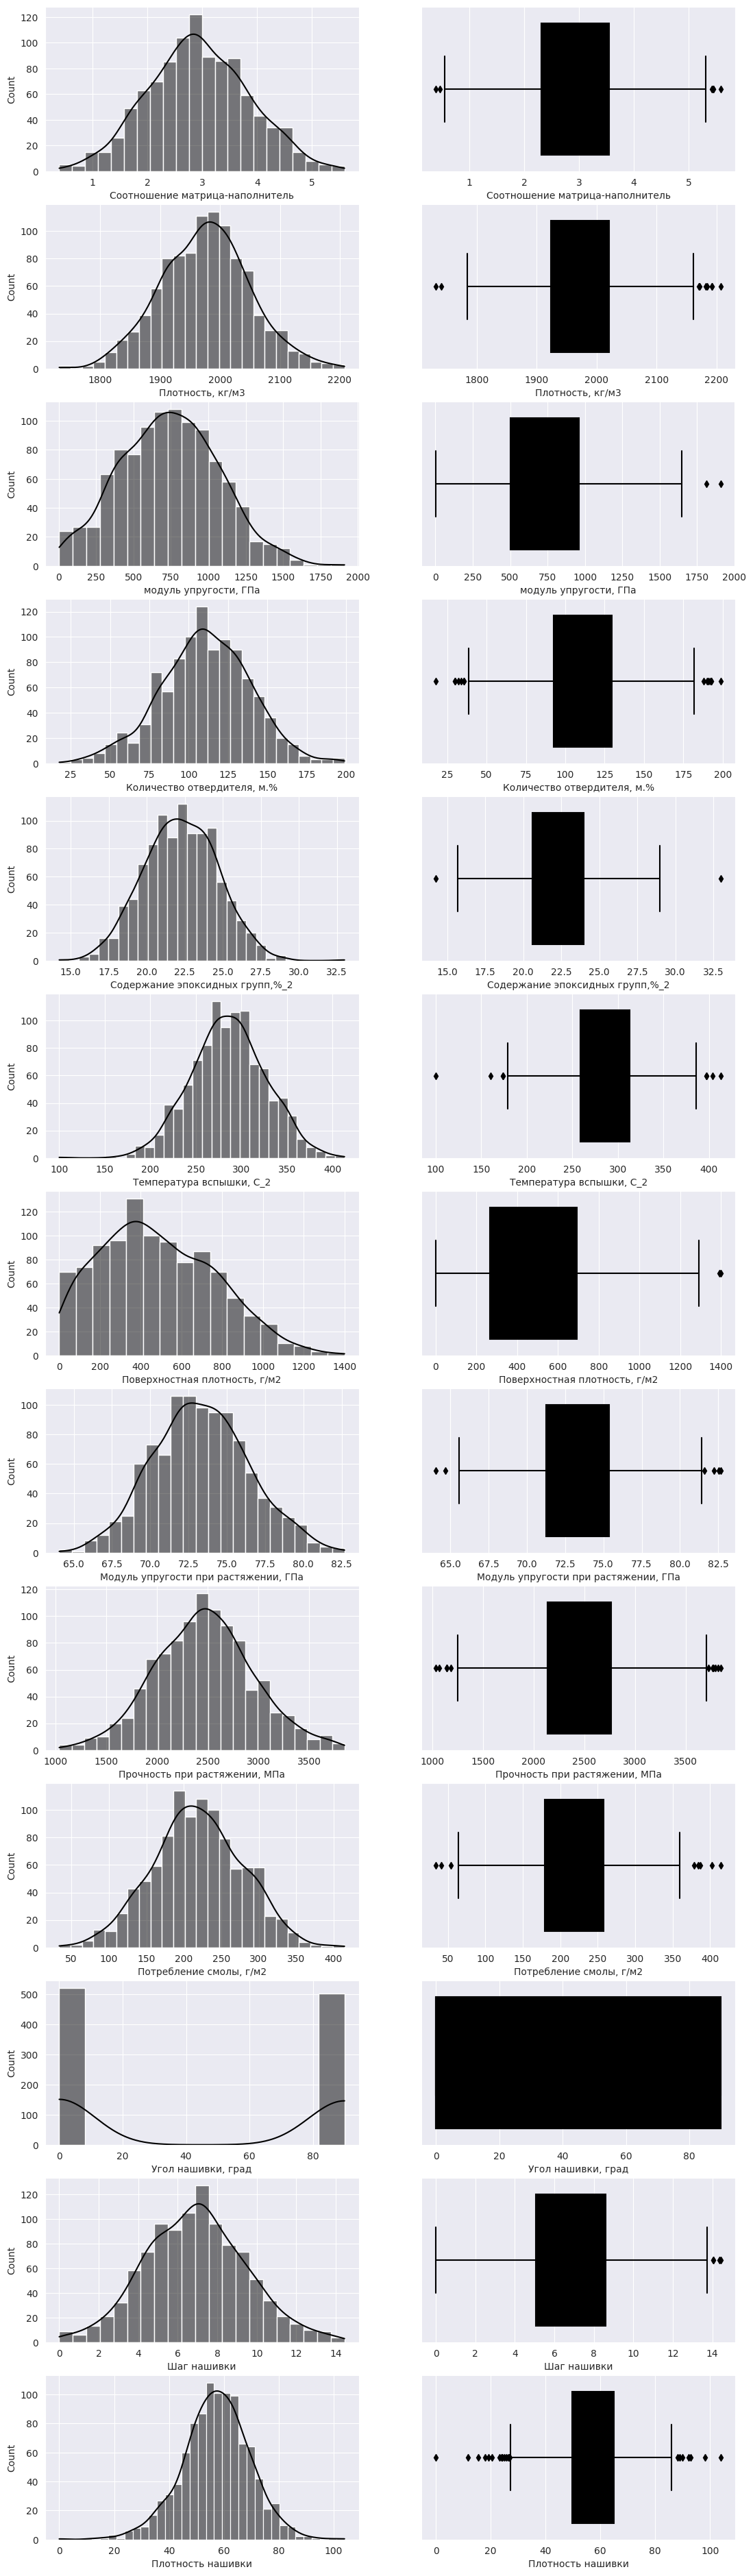

In [ ]:
# Гистограммы и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
colour = [  "black" ]
for k, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0],color = colour[k%len(colour)])
    sns.boxplot(data=df, x=column, ax=axes[k, 1], color = colour[k%len(colour)])
plt.show()

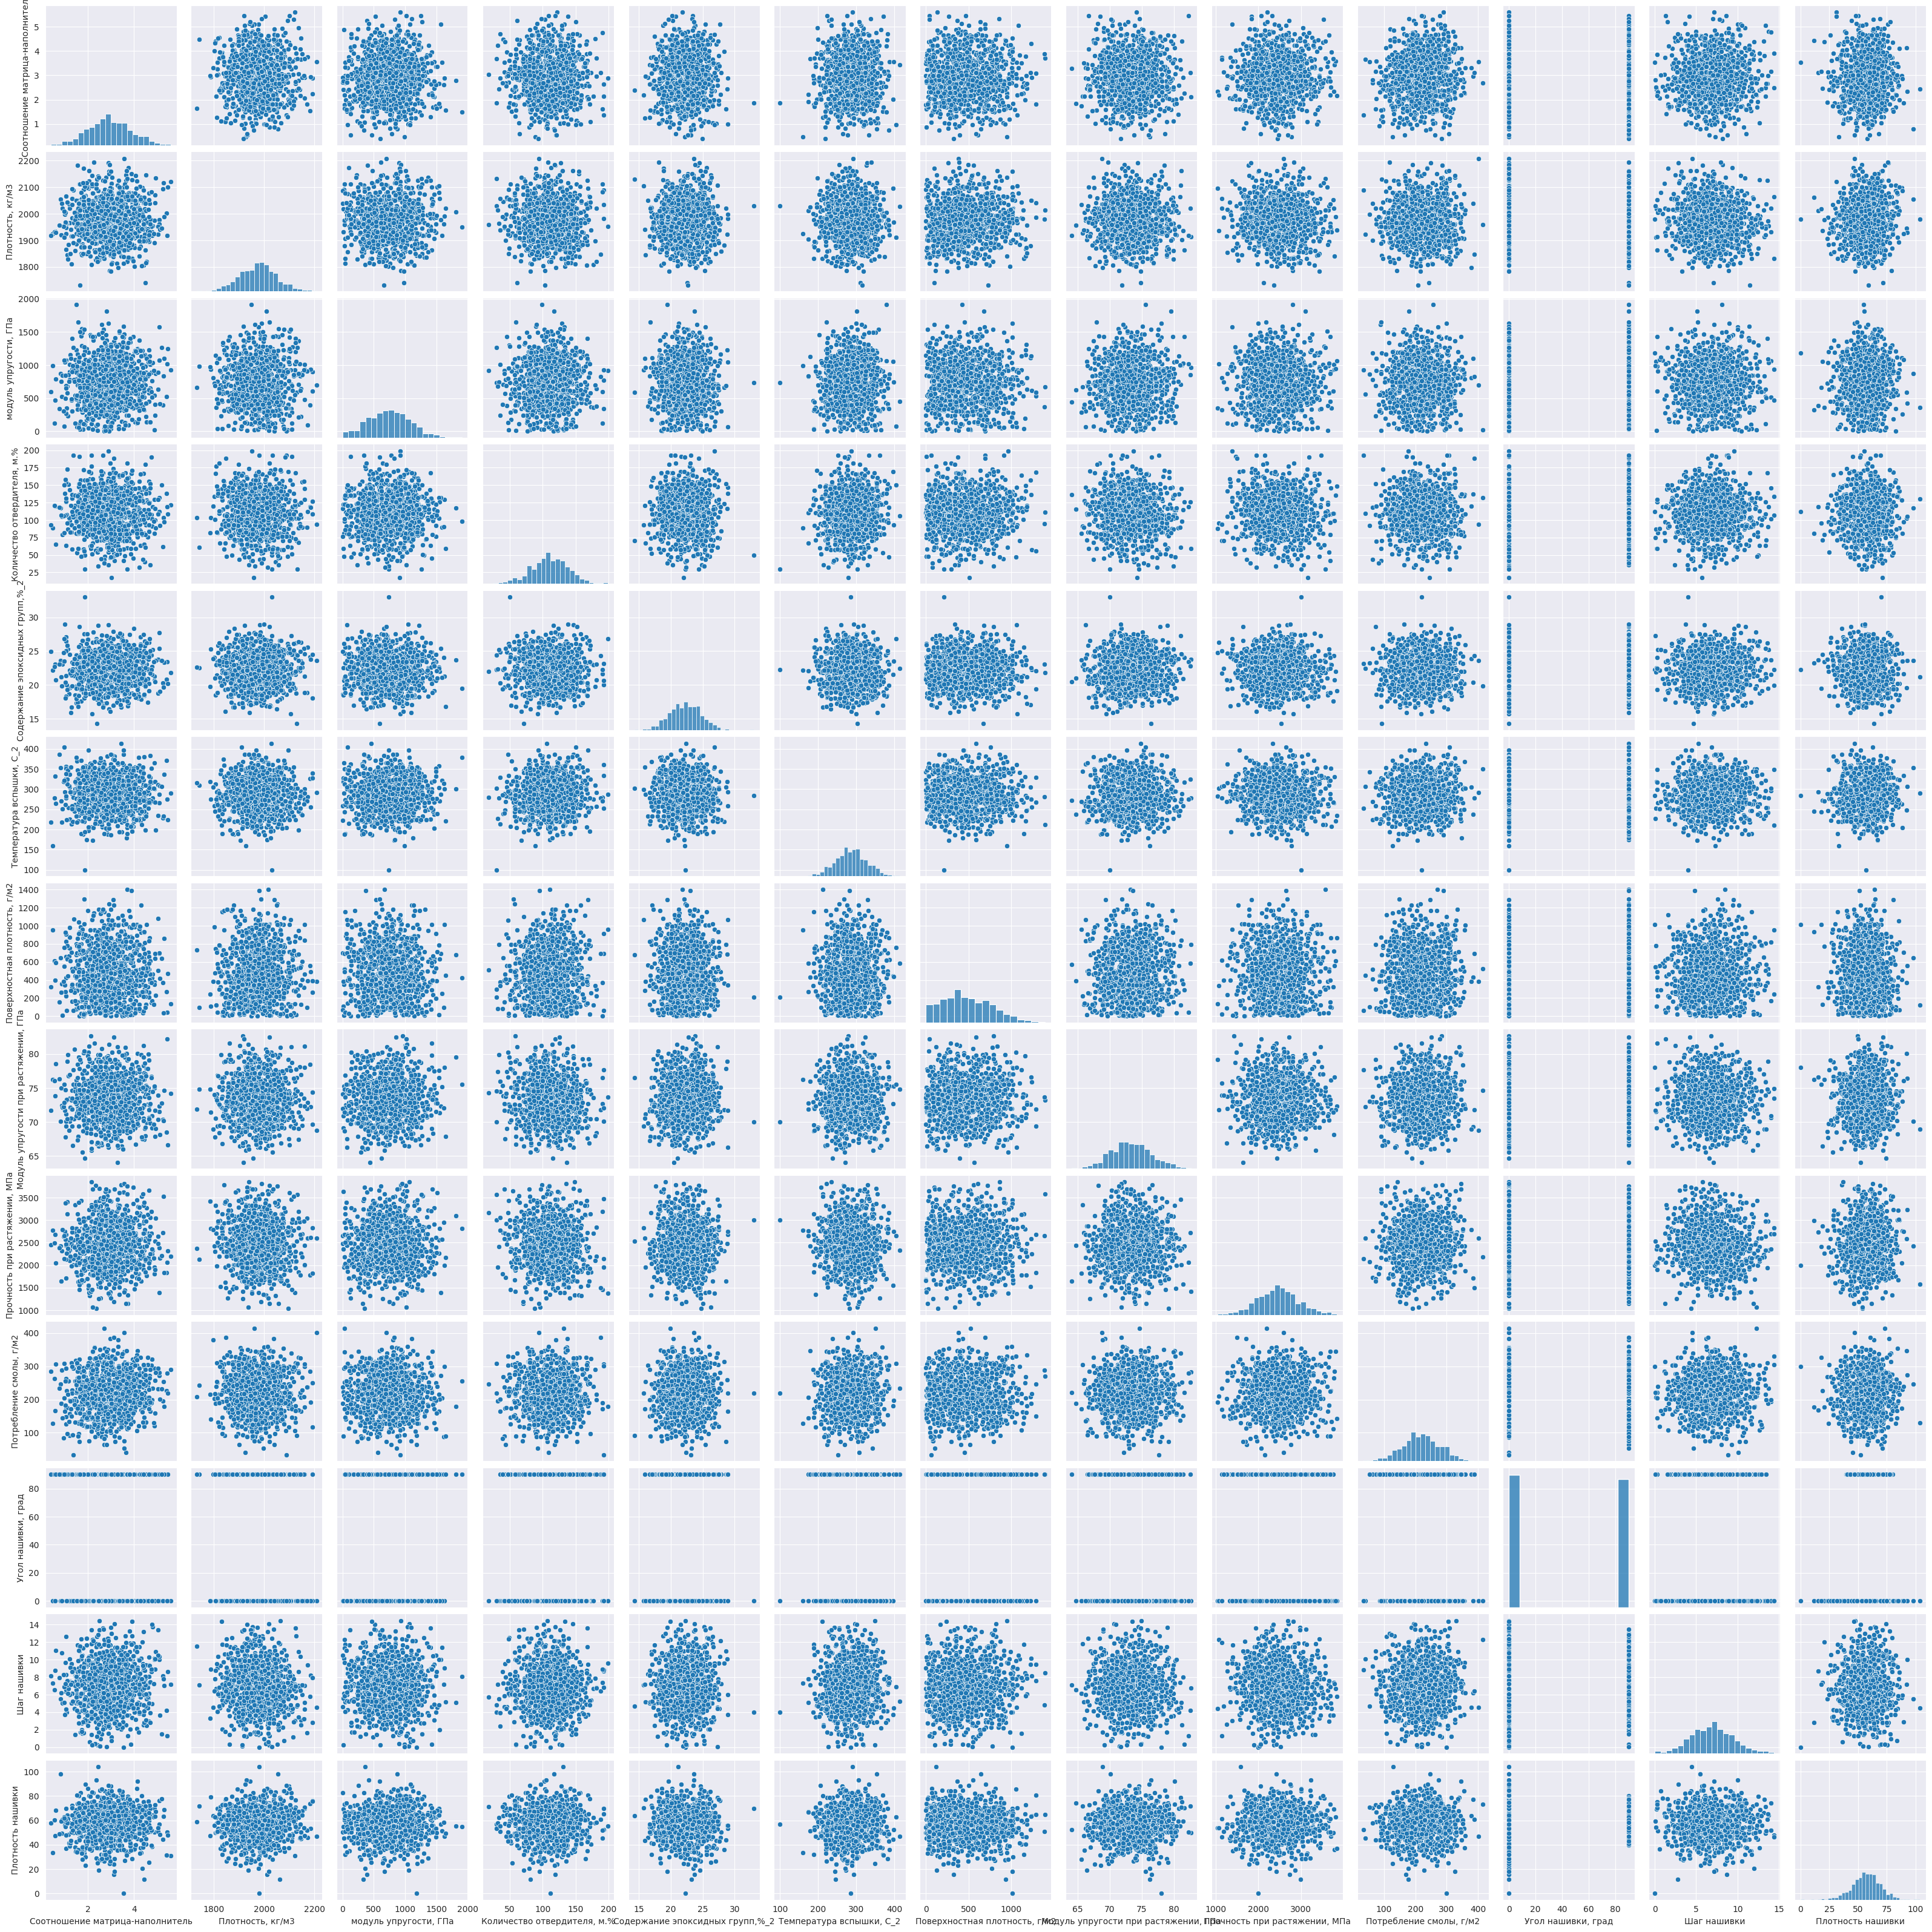

In [ ]:
# попарные графики рассеяния точек
sns.pairplot(df);
colour = [  "black" ]

In [ ]:
# Удаляем выбросы методом z-оценки
# Находим абсолютное значение z-балла для каждого наблюдения
z = np.abs(stats.zscore(df))
#сохраняем в df3 только строки со всеми z-баллами, меньшими абсолютного значения 3
df3 = df[(z<3).all(axis=1)]
df3.shape

(999, 13)

In [ ]:
df3.to_excel(data_path + 'data3_cleaned.xlsx')

OSError: ignored

In [21]:
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(np.array(df3)) 

In [22]:
df_std[:1]

array([[-1.18888933e+00,  7.47809295e-01,  8.75366921e-04,
        -2.18808048e+00,  6.35993028e-01, -3.35381328e-02,
        -9.71213357e-01, -1.06746730e+00,  1.10374226e+00,
         3.07429778e-02, -9.93017371e-01, -1.13800811e+00,
         2.29337005e-01]])

In [23]:
df4 = pd.DataFrame(data = df_std, columns=df3.columns)
df4.to_excel(data_path + 'data4_std.xlsx')
from joblib import dump, load
dump(std_scaler,'scaler_df.joblin')

OSError: ignored

In [24]:
df4.describe().style.format(precision=4)

<Axes: >

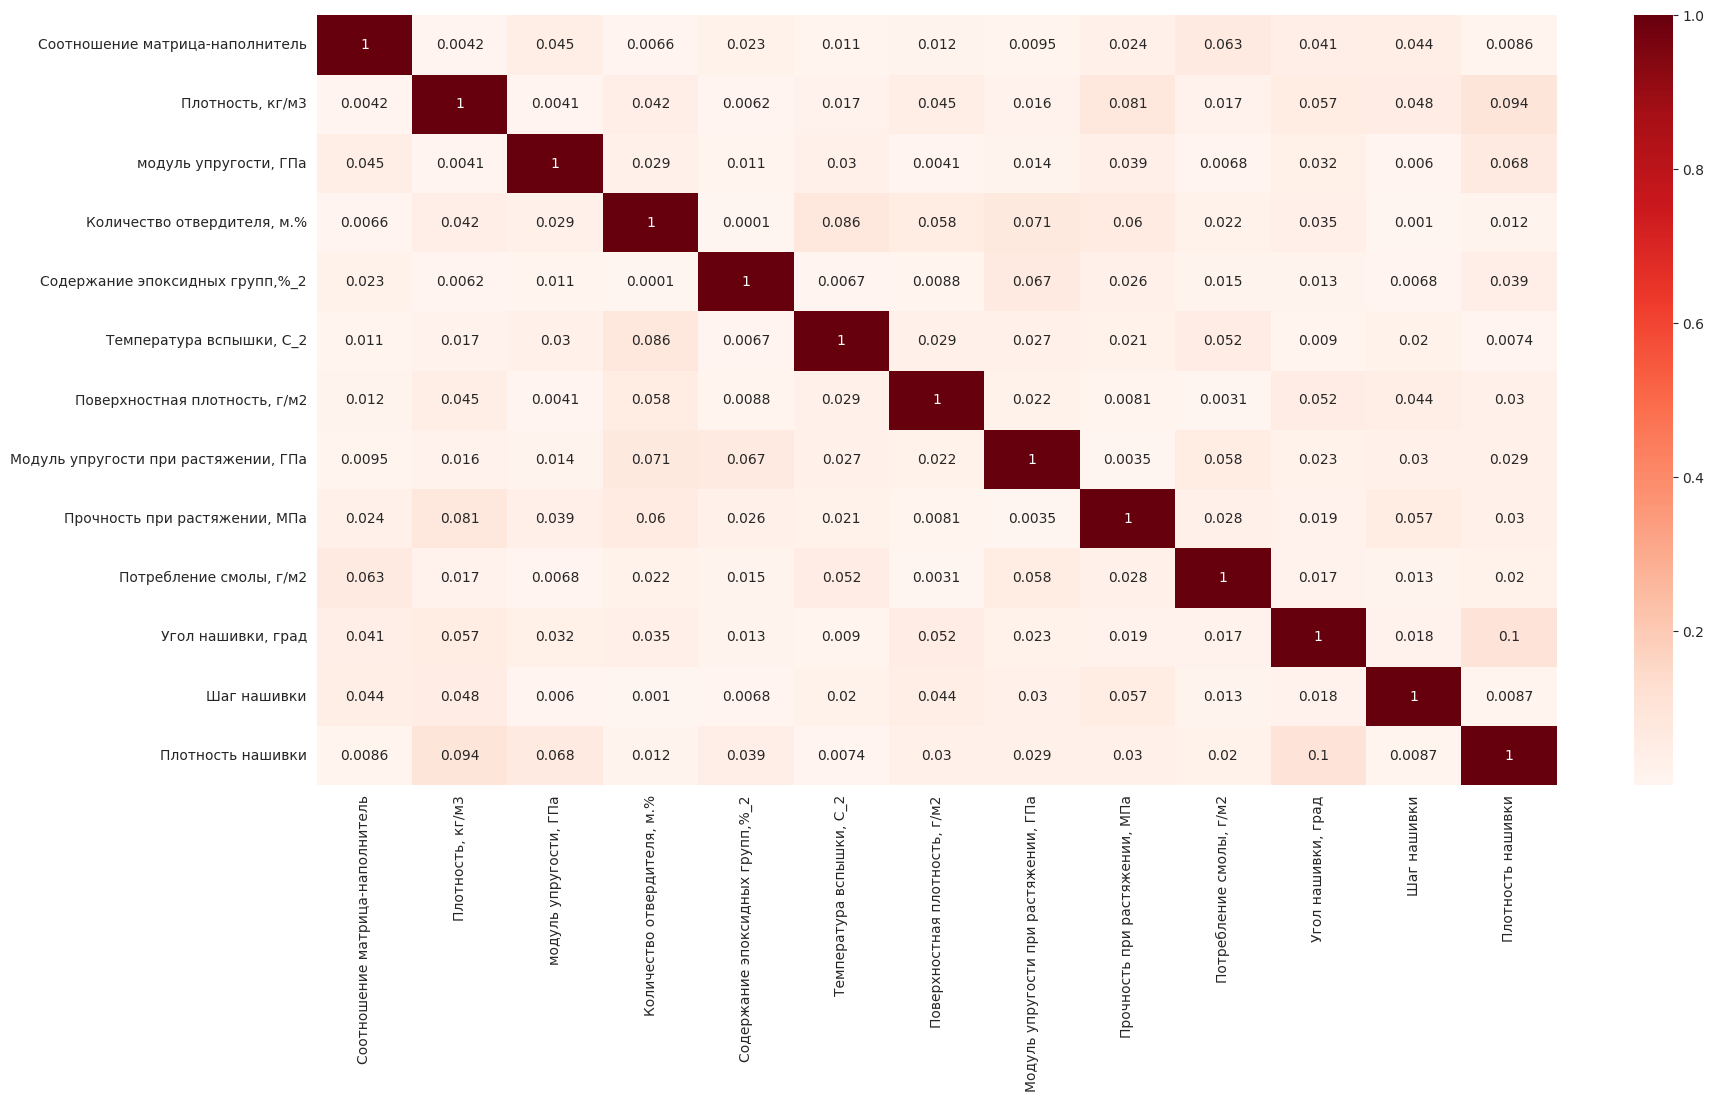

In [25]:

#@title Тепловая карта корреляции
plt.figure(figsize=(20, 10))
sns.heatmap(df4.corr().abs(), cmap='Reds', annot = True)

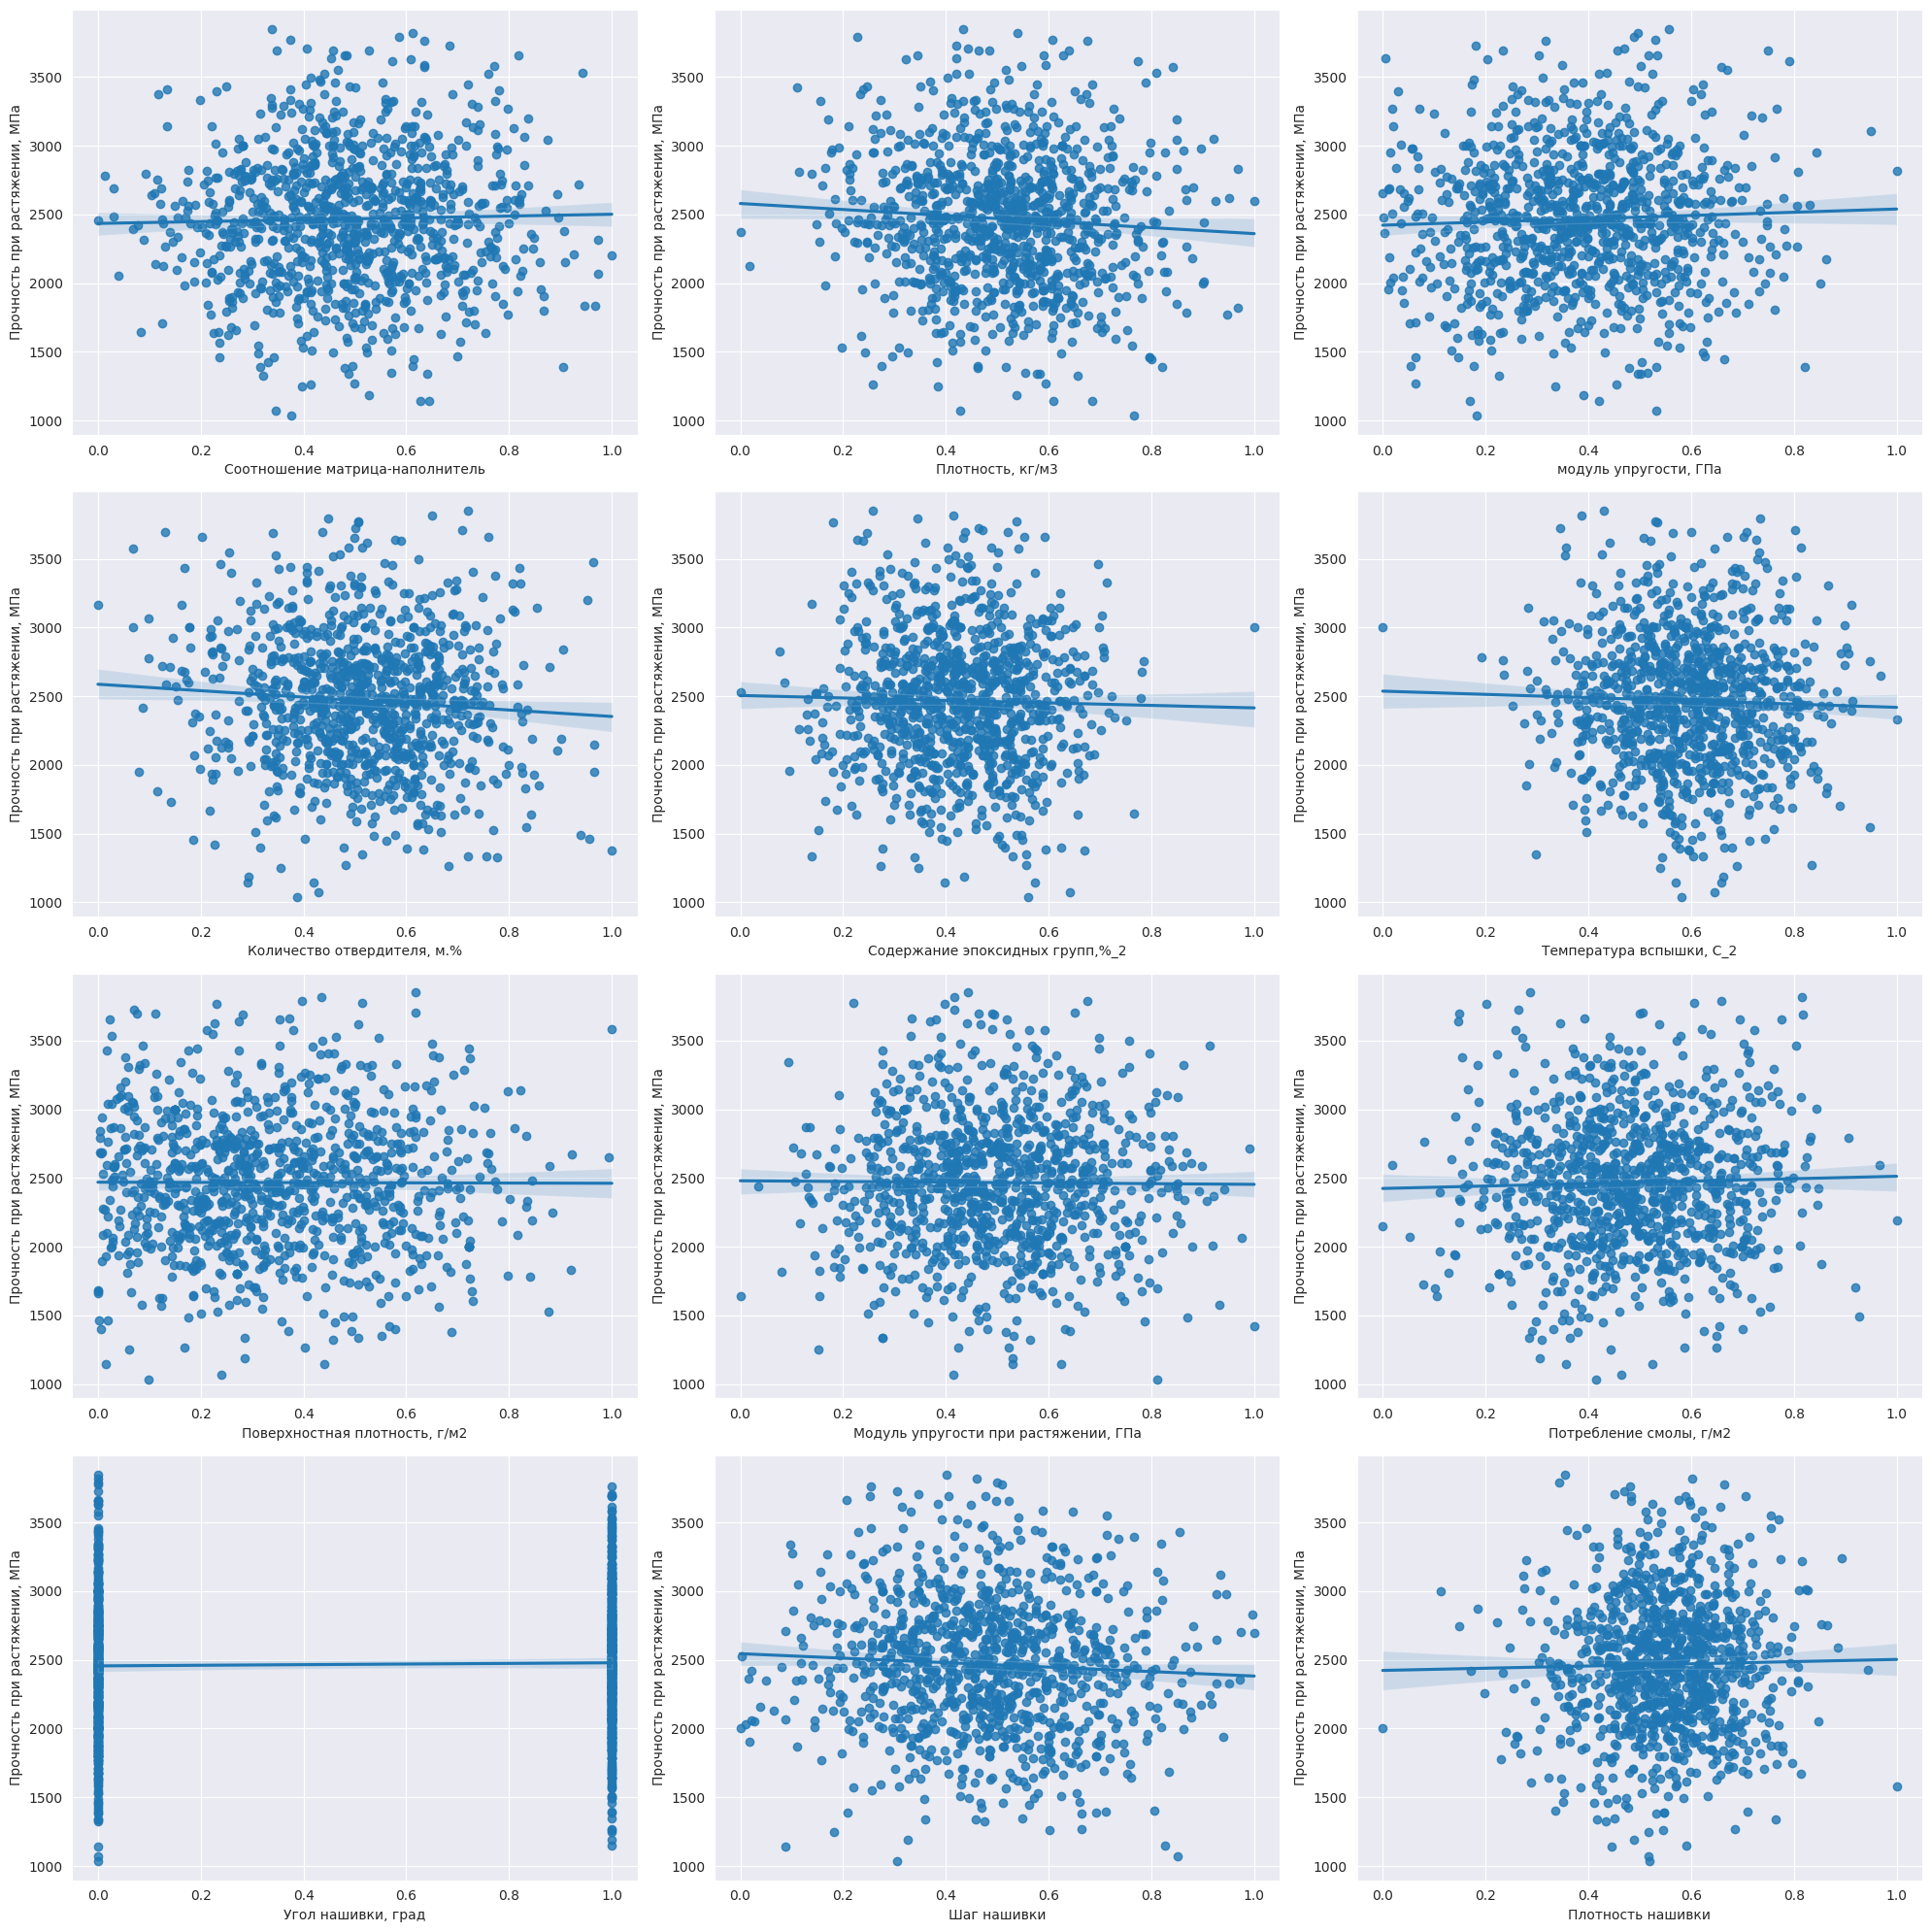

In [26]:
#@title Парные графики относительно - "Прочность при растяжении, МПа"
min_max_scaler = preprocessing.MinMaxScaler()

X_without_strength = ['Соотношение матрица-наполнитель',
                      'Плотность, кг/м3',
                      'модуль упругости, ГПа',
                      'Количество отвердителя, м.%',
                      'Содержание эпоксидных групп,%_2',
                      'Температура вспышки, С_2',
                      'Поверхностная плотность, г/м2',
                      'Модуль упругости при растяжении, ГПа',
                      'Потребление смолы, г/м2',
                      'Угол нашивки, град',
                      'Шаг нашивки',
                      'Плотность нашивки']

df_x = df.loc[:, X_without_strength]
df_y = df['Прочность при растяжении, МПа']

df_x_strength = pd.DataFrame(data = min_max_scaler.fit_transform(df_x),
                             columns = X_without_strength)

fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))

index = 0
axs = axs.flatten()

for i, j in enumerate(X_without_strength):
    sns.regplot(x = df_x_strength[j], y = df_y, ax = axs[i])

plt.tight_layout(pad = 1.08, w_pad = 1.08)

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df.drop('Модуль упругости при растяжении, ГПа', axis = 1))
y = np.array(df['Модуль упругости при растяжении, ГПа'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (716, 12) y_train: (716, 1)
X_test: (307, 12) y_test: (307, 1)


In [28]:
#@title Описательная статистика входных данных до предобработки
def show_statistics(s):
    return s.describe().loc[['min', 'max', 'mean', 'std'], :].T
show_statistics(pd.DataFrame(X))

min          max         mean         std
0      0.389403     5.591742     2.930366    0.913222
1   1731.764635  2207.773481  1975.734888   73.729231
2      2.436909  1911.536477   739.923233  330.231581
3     17.740275   198.953207   110.570769   28.295911
4     14.254985    33.000000    22.244390    2.406301
5    100.000000   413.273418   285.882151   40.943260
6      0.603740  1399.542362   482.731833  281.314690
7   1036.856605  3848.436732  2466.922843  485.628006
8     33.803026   414.590628   218.423144   59.735931
9      0.000000    90.000000    44.252199   45.015793
10     0.000000    14.440522     6.899222    2.563467
11     0.000000   103.988901    57.153929   12.350969

In [29]:
#@title Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(X_train))

min       max      mean       std
0   0.030369  0.973323  0.491355  0.173503
1   0.000000  0.967488  0.504872  0.152848
2   0.000996  1.000000  0.387056  0.173768
3   0.067412  1.000000  0.517743  0.154943
4   0.000000  0.781674  0.425981  0.127271
5   0.000000  1.000000  0.597652  0.131368
6   0.000000  1.000000  0.350453  0.205843
7   0.000000  1.000000  0.504044  0.174988
8   0.019027  1.000000  0.486218  0.155863
9   0.000000  1.000000  0.490223  0.500254
10  0.000000  1.000000  0.476462  0.178921
11  0.000000  1.000000  0.548784  0.120915

In [30]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np


#X, y = shuffle(df, random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:30<00:00,  1.40it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                       -0.10       0.03  2.91        0.09
ExtraTreesRegressor                         -0.12       0.01  2.94        0.45
PoissonRegressor                            -0.14      -0.01  2.96        0.09
RidgeCV                                     -0.14      -0.01  2.96        0.02
GammaRegressor                              -0.14      -0.01  2.96        0.05
Ridge                                       -0.14      -0.01  2.96        0.01
Lars                                        -0.14      -0.01  2.96        0.03
LinearRegression                            -0.14      -0.01  2.96        0.02
TransformedTargetRegressor                  -0.14      -0.01  2.96        0.02
TweedieRegressor                            -0.14      -0.01  2.96        0.05
SGDRegressor                                -0.14   

In [31]:
#@title Линейная регрессия ...
scores_map = {}

# Обычная линейная регрессия методом наименьших квадратов
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

y_pred = l_regressor.predict(X_test)

kf = KFold(n_splits=10)

scores = cross_val_score(l_regressor, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')


#y_pred = standard_scaler.inverse_transform(l_regressor.predict([X_test[10]]))
#
#l_regressor.predict(standard_scaler.transform(X_valid))

scores_map['LinearRegression'] = scores

print('Обычная линейная регрессия методом наименьших квадратов')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

# Линейный метод наименьших квадратов с регуляризацией l2
l_ridge = linear_model.Ridge()
l_ridge.fit(X_train, y_train)

y_pred = l_ridge.predict(X_test)

scores = cross_val_score(l_ridge, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')

scores_map['Ridge'] = scores

print('Линейный метод наименьших квадратов с регуляризацией l2')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

p_ridge = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
p_ridge.fit(X_train, y_train)

y_pred = p_ridge.predict(X_test)

scores = cross_val_score(p_ridge, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['PolyRidge'] = scores

print('PolyRidge')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Обычная линейная регрессия методом наименьших квадратов
MAE:  2.373626825251185
MSE:  8.784993653872785
RMSE:  2.9639489965032775


Линейный метод наименьших квадратов с регуляризацией l2
MAE:  2.373621640225775
MSE:  8.784970507332442
RMSE:  2.9639450918214463


PolyRidge
MAE:  24.57198032854909
MSE:  1131.1298764795777
RMSE:  33.63227432808518


In [61]:
pickle.dump(model, open('linear_model.Ridge()', 'wb'))

!ls

'linear_model.Ridge()'	 X_bp.csv		       X_bp.xlsxdata4_std.xlsx
 model.pkl		 X_bp.xlsx		       X_nup.csv
 sample_data		 X_bp.xlsxdata3_cleaned.xlsx   X_nup.xlsx


In [32]:
#@title Regression based on k-nearest neighbors ...
knn = KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['KNeighborsRegressor'] = scores
print('Regression based on k-nearest neighbors ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regression based on k-nearest neighbors ...
MAE:  2.352484842164322
MSE:  9.269594214696372
RMSE:  3.0446008301083367


In [33]:
#@title Дерево решений ...
desc_tr = DecisionTreeRegressor(max_depth = None)

desc_tr.fit(X_train, y_train)

y_pred = desc_tr.predict(X_test)

scores = cross_val_score(desc_tr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['DecisionTreeRegressor'] = scores

print('Дерево решений ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений ...
MAE:  3.6539865660540167
MSE:  19.803343322383085
RMSE:  4.450094754315136


In [ ]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [34]:
#@title Gradient Boosting ...
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 2,
                                min_samples_leaf = 1, min_samples_split = 3,
                                n_estimators = 100, random_state = 30)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)


scores = cross_val_score(gbr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['GradientBoostingRegressor'] = scores

print('Gradient Boosting ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Gradient Boosting ...
MAE:  2.393644195839699
MSE:  8.967404152185967
RMSE:  2.994562430837929


<Axes: >

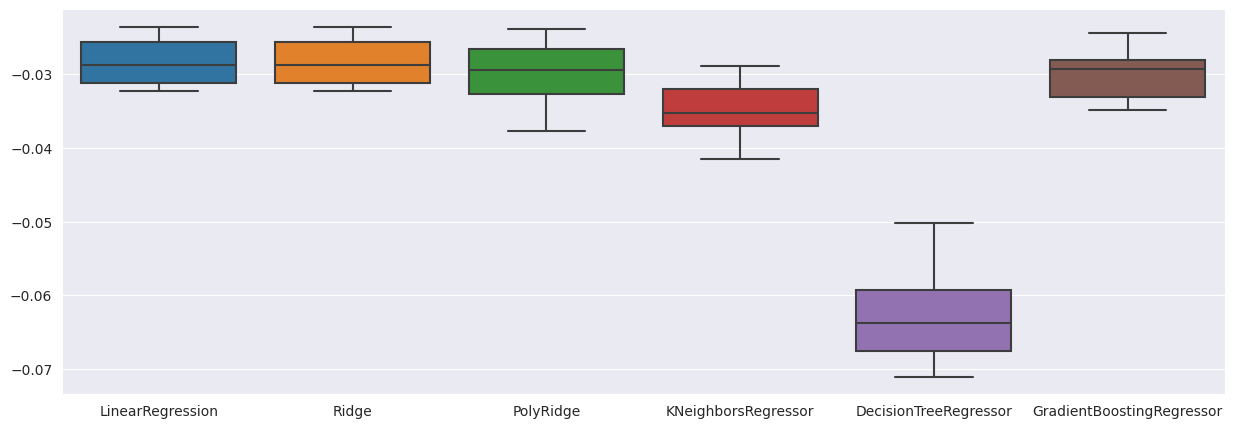

In [35]:
#@title Сравнение моделей с параметрами по умолчанию
plt.figure(figsize=(15, 5))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)

In [36]:
scores_map.style.highlight_max(axis = 0)

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df.drop('Прочность при растяжении, МПа', axis = 1))
y = np.array(df['Прочность при растяжении, МПа'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (716, 12) y_train: (716, 1)
X_test: (307, 12) y_test: (307, 1)


In [38]:
#@title Описательная статистика входных данных до предобработки
def show_statistics(s):
    return s.describe().loc[['min', 'max', 'mean', 'std'], :].T
show_statistics(pd.DataFrame(X))

min     max    mean    std
0     0.39    5.59    2.93   0.91
1  1731.76 2207.77 1975.73  73.73
2     2.44 1911.54  739.92 330.23
3    17.74  198.95  110.57  28.30
4    14.25   33.00   22.24   2.41
5   100.00  413.27  285.88  40.94
6     0.60 1399.54  482.73 281.31
7    64.05   82.68   73.33   3.12
8    33.80  414.59  218.42  59.74
9     0.00   90.00   44.25  45.02
10    0.00   14.44    6.90   2.56
11    0.00  103.99   57.15  12.35

In [39]:
#@title Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(X_train))

min  max  mean  std
0  0.00 1.00  0.49 0.18
1  0.14 1.00  0.51 0.15
2  0.00 0.86  0.38 0.17
3  0.00 1.00  0.51 0.15
4  0.00 1.00  0.42 0.13
5  0.00 1.00  0.60 0.13
6  0.00 1.00  0.35 0.20
7  0.03 1.00  0.49 0.17
8  0.02 1.00  0.49 0.16
9  0.00 1.00  0.50 0.50
10 0.01 1.00  0.48 0.18
11 0.11 1.00  0.55 0.12

In [40]:
#@title Линейная регрессия ...
scores_map = {}

# Обычная линейная регрессия методом наименьших квадратов
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

y_pred = l_regressor.predict(X_test)

kf = KFold(n_splits=10)

scores = cross_val_score(l_regressor, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')


#y_pred = standard_scaler.inverse_transform(l_regressor.predict([X_test[10]]))
#
#l_regressor.predict(standard_scaler.transform(X_valid))

scores_map['LinearRegression'] = scores

print('Обычная линейная регрессия методом наименьших квадратов')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

# Линейный метод наименьших квадратов с регуляризацией l2
l_ridge = linear_model.Ridge()
l_ridge.fit(X_train, y_train)

y_pred = l_ridge.predict(X_test)

scores = cross_val_score(l_ridge, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')

scores_map['Ridge'] = scores

print('Линейный метод наименьших квадратов с регуляризацией l2')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

p_ridge = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
p_ridge.fit(X_train, y_train)

y_pred = p_ridge.predict(X_test)

scores = cross_val_score(p_ridge, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['PolyRidge'] = scores

print('PolyRidge')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Обычная линейная регрессия методом наименьших квадратов
MAE:  0.13033743951254262
MSE:  0.027053646528241826
RMSE:  0.16447992743262574


Линейный метод наименьших квадратов с регуляризацией l2
MAE:  0.13026257006396555
MSE:  0.027035173978080532
RMSE:  0.1644237634226894


PolyRidge
MAE:  0.1308061993389661
MSE:  0.026840976687004834
RMSE:  0.16383216011212462


In [41]:
#@title Regression based on k-nearest neighbors ...
knn = KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['KNeighborsRegressor'] = scores
print('Regression based on k-nearest neighbors ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regression based on k-nearest neighbors ...
MAE:  0.13871140968116538
MSE:  0.030940215105222983
RMSE:  0.17589830898909456


In [42]:
#@title Дерево решений ...
desc_tr = DecisionTreeRegressor(max_depth = None)

desc_tr.fit(X_train, y_train)

y_pred = desc_tr.predict(X_test)

scores = cross_val_score(desc_tr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['DecisionTreeRegressor'] = scores

print('Дерево решений ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений ...
MAE:  0.19991876605285822
MSE:  0.06436383094212529
RMSE:  0.25370027777305504


In [43]:
#@title Gradient Boosting ...
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 2,
                                min_samples_leaf = 1, min_samples_split = 3,
                                n_estimators = 100, random_state = 30)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)


scores = cross_val_score(gbr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['GradientBoostingRegressor'] = scores

print('Gradient Boosting ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Gradient Boosting ...
MAE:  0.13259253595385712
MSE:  0.027575040869624225
RMSE:  0.1660573421129708


<Axes: >

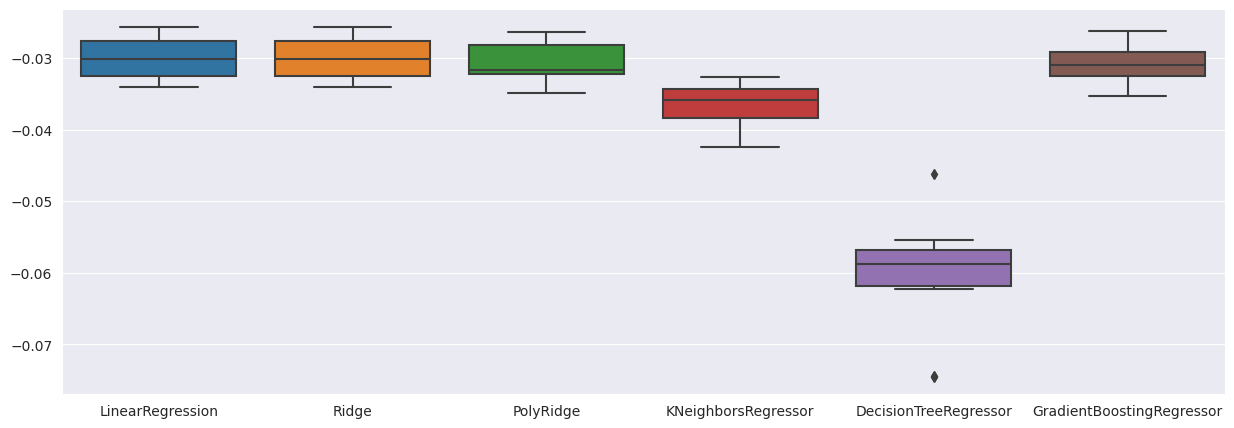

In [44]:
#@title Сравнение моделей с параметрами по умолчанию
plt.figure(figsize=(15, 5))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)
     

In [45]:
scores_map.style.highlight_max(axis = 0)

In [ ]:
#!pip install tensorflow
#!conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
#!python -m pip install "tensorflow<2.11"


In [46]:
#@title Нейронная сеть, которая рекомендует соотношение матрица-наполнитель
import tensorflow as tf
from tensorflow import keras

from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense
from keras import utils
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.layers import Dropout


from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

#print(f'tensorflow ver: {tf.__version__}')

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df.drop('Соотношение матрица-наполнитель', axis = 1))
y = np.array(df['Соотношение матрица-наполнитель'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

In [48]:
print(X_scaled.shape, y_scaled.shape)
print(X_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

(1023, 12) (1023, 1)
(716, 12) (716, 1)
(307, 1) (307, 1)


In [49]:
#@title Фуекция собирающая НС
def construct_model():
    return tf.keras.Sequential([
    keras.layers.Input(shape=(12,)),                   
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1)                        
    ])
     

def compile_model(model):
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.MeanAbsolutePercentageError(),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model
     

#@title График ошибки
def plot_loss(history):
    fig, axes = plt.subplots(figsize=(15, 5))
    axes.plot(history['root_mean_squared_error'], label='loss')
    axes.plot(history['val_root_mean_squared_error'], label='val_loss')
    axes.set_xlabel('Эпоха')
    axes.set_ylabel('RMSE')
    axes.legend()
    axes.grid(True)
    plt.show()
     

#@title Сборка НС
model = construct_model()
     

#@title Компиляция НС
model = compile_model(model)
     

#@title Сводная информация по архитектуре сети
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4

In [50]:
%%time
#Обучение нейросети
history = model.fit(X_train, y_train, epochs = 100,
                    validation_split = 0.3, verbose = 1)

Epoch 1/100
16/16 [==============================] - 2s 24ms/step - loss: 63.1898 - root_mean_squared_error: 0.3620 - val_loss: 1891390.5000 - val_root_mean_squared_error: 0.2111
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 47.8267 - root_mean_squared_error: 0.2405 - val_loss: 1292971.6250 - val_root_mean_squared_error: 0.2706
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 45.6862 - root_mean_squared_error: 0.2457 - val_loss: 1541207.2500 - val_root_mean_squared_error: 0.2366
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 46.3127 - root_mean_squared_error: 0.2406 - val_loss: 1331513.7500 - val_root_mean_squared_error: 0.2766
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 47.8022 - root_mean_squared_error: 0.2411 - val_loss: 1481735.8750 - val_root_mean_squared_error: 0.2519
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 43.1007 - root_mean_squared_error: 0

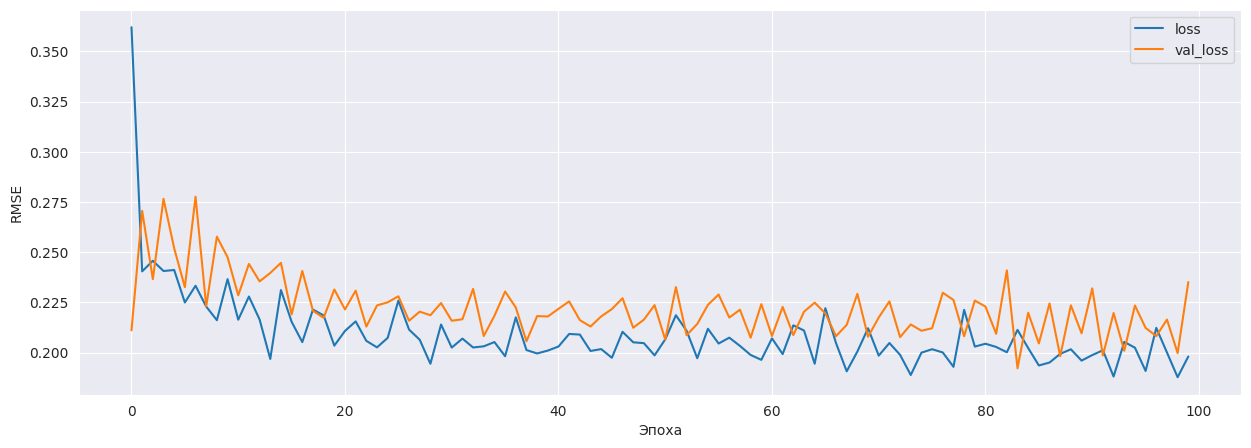

In [51]:
plot_loss(history.history)

In [52]:
# Проверяем точность нейросети на тестовых данных
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 37.9439 - root_mean_squared_error: 0.2353


[37.94390869140625, 0.2353321760892868]

In [53]:
# Предсказание 
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


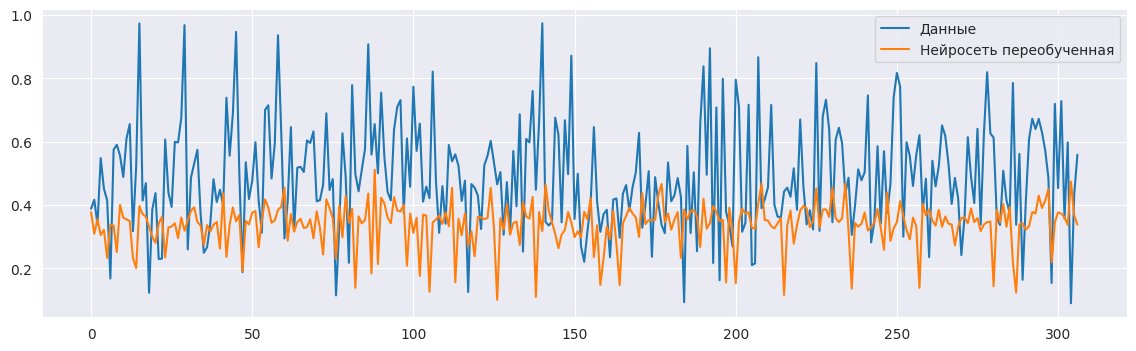

In [54]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_test, label='Данные')
ax.plot(y_pred, label='Нейросеть переобученная')
ax.legend()
plt.show()

In [55]:
#@title Сохраняем модель
pickle.dump(model, open('model.pkl', 'wb'))

!ls

model.pkl    X_bp.csv	X_bp.xlsxdata3_cleaned.xlsx  X_nup.csv
sample_data  X_bp.xlsx	X_bp.xlsxdata4_std.xlsx      X_nup.xlsx


In [63]:
import tensorflow as tf
import os, sys
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
model_loaded = ("/content/model.pkl") #Нужно указать путь к модели
col=['Cоотношение матрица-наполнитель %','Плотность, кг/м3 %', 'модуль упругости, ГПа %','Количество отвердителя, м.% %','Содержание эпоксидных групп,%_2 %','Температура вспышки, С_2 %','Поверхностная плотность, г/м2 %','Модуль упругости при растяжении,ГПа %','Потребление смолы, г/м2 %','Угол нашивки, град %','Шаг нашивки %','Плотность нашивки %']
diap=['(0.88.....8.5)','(2300......3882)', '(4......2391)', '(50......291)','(20......48)', '(260......636)','(3.....1791)','(86.....144)','(90.....590)','(0...173)','(1.....21)','(39....138)']
input_val = pd.DataFrame()
j = []
i = 0
print("Модель прогноза- Прочность при растяжении, Мпа %")
while i < len(col):
    line = f" {col[i]}{diap[i]}: "
    while True:
        try:
            param_val = input(line)
            param_value=float(param_val)
        except:
            print("ОШИБКА введите числовое значение")
            continue
        break
    j.append(param_value)
    i += 1
df= pd.DataFrame([j],columns =col)
test_predictions = linear_model.Ridge(df)
print(" Прогнозное значение прочность при растяжении:",str(test_predictions)[1:-1])


Модель прогноза- Прочность при растяжении, Мпа %
 Cоотношение матрица-наполнитель %(0.88.....8.5): 4
 Плотность, кг/м3 %(2300......3882): 3000
 модуль упругости, ГПа %(4......2391): 100
 Количество отвердителя, м.% %(50......291): 67
 Содержание эпоксидных групп,%_2 %(20......48): 30
 Температура вспышки, С_2 %(260......636): 489
 Поверхностная плотность, г/м2 %(3.....1791): 356
 Модуль упругости при растяжении,ГПа %(86.....144): 122
 Потребление смолы, г/м2 %(90.....590): 400
 Угол нашивки, град %(0...173): 56
 Шаг нашивки %(1.....21): 12
 Плотность нашивки %(39....138): 45
 Прогнозное значение прочность при растяжении: idge(alpha=   Cоотношение матрица-наполнитель %  Плотность, кг/м3 %  \
0                               4.00             3000.00   

   модуль упругости, ГПа %  Количество отвердителя, м.% %  \
0                   100.00                          67.00   

   Содержание эпоксидных групп,%_2 %  Температура вспышки, С_2 %  \
0                              30.00            